<a href="https://colab.research.google.com/github/MJanbandhu/DeepLearning/blob/main/CNN_Python_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Why convolution?

SPATIAL INVARIANCE or LOSS IN FEATURES

The spatial features of a 2D image are lost when it is flattened to a 1D vector input. Before feeding an image to the hidden layers of an MLP, we must flatten the image matrix to a 1D vector. This implies that all of the image's 2D information is discarded.

In [ ]:
from google.colab.patches import cv2_imshow
import os, json, cv2, random

!wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O input.jpg
im = cv2.imread("./input.jpg")
cv2_imshow(im)

In [ ]:
im

#### Sample Image

![title](https://aishack.in/static/img/tut/conv-gaussian-blur.jpg)

## Increase in  Parameter Issue

While increase in  Parameter Issue is not a big problem for the
MNIST dataset because the images are really small in size (28 × 28), what happens when we try to process larger images?

For example, if we have an image with dimensions 1,000 × 1,000, it will yield 1 million parameters for each node in the first hidden layer.

- So if the first hidden layer has 1,000 neurons, this will yield 1 billion parameters even in such a small network. You can imagine the computational complexity of optimizing 1 billion parameters after only the first layer.


### Fully Connected Neural Net

![title](https://www.researchgate.net/profile/Arvind-Sreenivas/publication/343263135/figure/fig3/AS:918277995905024@1595945943003/Fully-connected-layer.jpg)


### Local Connected Neural Net

![title](https://www.cs.toronto.edu/~lczhang/360/lec/w04/imgs/local.png)

[Source](https://www.cs.toronto.edu)


### Guide for design of a neural network architecture suitable for computer vision

- In the earliest layers, our network should respond similarly to the same patch, regardless of where it appears in the image. This principle is called translation invariance.
- The earliest layers of the network should focus on local regions, without regard for the contents of the image in distant regions. This is the locality principle. Eventually, these local representations can be aggregated to make predictions at the whole image level.

### Human Brain Visual Cortex processing

![](https://www.researchgate.net/profile/Bruno-Cessac/publication/233971662/figure/fig1/AS:393541936271366@1470839117205/Processing-steps-of-the-visual-stream-a-The-cellular-organization-of-the-retina-from.png)

In [ ]:
https://distill.pub/2017/feature-visualization/

# What are Convolutional Neural Networks?


Convolutional Neural Networks (ConvNets or CNNs) are a category of Neural Networks that have proven very effective in areas such as image recognition and classification. ConvNets have been successful in identifying faces, objects and traffic signs apart from powering vision in robots and self driving cars.


A Convolutional Neural Network (CNN) is comprised of one or more convolutional layers (often with a subsampling step) and then followed by one or more fully connected layers as in a standard multilayer neural network. The architecture of a CNN is designed to take advantage of the 2D structure of an input image (or other 2D input such as a speech signal). This is achieved with local connections and tied weights followed by some form of pooling which results in translation invariant features. Another benefit of CNNs is that they are easier to train and have many fewer parameters than fully connected networks with the same number of hidden units. In this article we will discuss the architecture of a CNN and the back propagation algorithm to compute the gradient with respect to the parameters of the model in order to use gradient based optimization.

## Visualizing the Process


## Simple Convolution

![](https://miro.medium.com/max/1400/1*Fw-ehcNBR9byHtho-Rxbtw.gif)

## Matrix Calculation

![](https://miro.medium.com/max/535/1*Zx-ZMLKab7VOCQTxdZ1OAw.gif)

## Padding Concept
![](https://miro.medium.com/max/395/1*1okwhewf5KCtIPaFib4XaA.gif)

## Stride Concept
![](https://miro.medium.com/max/294/1*BMngs93_rm2_BpJFH2mS0Q.gif)

## Feature Accumulation
![](https://miro.medium.com/max/2000/1*8dx6nxpUh2JqvYWPadTwMQ.gif)

## Feature Aggregation
![](https://miro.medium.com/max/2000/1*CYB2dyR3EhFs1xNLK8ewiA.gif)

## Convolution Operation

![](https://cdn-media-1.freecodecamp.org/images/gb08-2i83P5wPzs3SL-vosNb6Iur5kb5ZH43)


[Source](https://https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1)

[Source](https://cs231n.github.io/convolutional-networks/)


# The CNN Complete Network Overview

![CNN Image](https://res.cloudinary.com/practicaldev/image/fetch/s--w1RZuJPn--/c_imagga_scale,f_auto,fl_progressive,h_420,q_auto,w_1000/https://dev-to-uploads.s3.amazonaws.com/i/1inc9c00m35q12lidqde.png)


# Best Place to Explore Kernels

[Kernels](https://setosa.io/ev/image-kernels/)

[Kernels as Edge Detector](https://aishack.in/tutorials/image-convolution-examples/)

### Features extracted by Kernels

![](https://cs231n.github.io/assets/cnn/weights.jpeg)

### Features > Patterns > Parts of Object
![](http://media5.datahacker.rs/2018/10/features_3images.png)

[Source](https://cs231n.github.io/convolutional-networks/)

## Intuition

Let's develop better intuition for how Convolutional Neural Networks (CNN) work. We'll examine how humans classify images, and then see how CNNs use similar approaches.

Let’s say we wanted to classify the following image of a dog as a Golden Retriever:

<img src="https://d17h27t6h515a5.cloudfront.net/topher/2016/November/58377b77_dog-1210559-1280/dog-1210559-1280.jpg" width="500" height="500">

As humans, how do we do this?

One thing we do is that we identify certain parts of the dog, such as the nose, the eyes, and the fur. We essentially break up the image into smaller pieces, recognize the smaller pieces, and then combine those pieces to get an idea of the overall dog.

In this case, we might break down the image into a combination of the following:

* A nose
* Two eyes
* Golden fur

These pieces can be seen below:

As humans, how do we do this?

One thing we do is that we identify certain parts of the dog, such as the nose, the eyes, and the fur. We essentially break up the image into smaller pieces, recognize the smaller pieces, and then combine those pieces to get an idea of the overall dog.

In this case, we might break down the image into a combination of the following:

* A nose
* Two eyes
* Golden fur

These pieces can be seen below:


<img src="https://d17h27t6h515a5.cloudfront.net/topher/2016/November/58377bdb_screen-shot-2016-11-24-at-12.49.08-pm/screen-shot-2016-11-24-at-12.49.08-pm.png" width="250" height="250">
<center>The eye of the dog.</center>
<br>

<img src="https://d17h27t6h515a5.cloudfront.net/topher/2016/November/58377bed_screen-shot-2016-11-24-at-12.49.43-pm/screen-shot-2016-11-24-at-12.49.43-pm.png" width="250" height="250">
<center>The nose of the dog.</center>
<br>

<img src="https://d17h27t6h515a5.cloudfront.net/topher/2016/November/58377bff_screen-shot-2016-11-24-at-12.50.54-pm/screen-shot-2016-11-24-at-12.50.54-pm.png" width="250" height="250">
<center>The fur of the dog.</center>

### Going One Step Further

But let’s take this one step further. How do we determine what exactly a nose is? A Golden Retriever nose can be seen as an oval with two black holes inside it. Thus, one way of classifying a Retriever’s nose is to to break it up into smaller pieces and look for black holes (nostrils) and curves that define an oval as shown below:

<img src="https://d17h27t6h515a5.cloudfront.net/topher/2016/November/58377c52_screen-shot-2016-11-24-at-12.51.47-pm/screen-shot-2016-11-24-at-12.51.47-pm.png">
<center>A curve that we can use to determine a nose</center>
<br>

<img src="https://d17h27t6h515a5.cloudfront.net/topher/2016/November/58377c68_screen-shot-2016-11-24-at-12.51.51-pm/screen-shot-2016-11-24-at-12.51.51-pm.png">
<center>A nostril that we can use to classify the nose of the dog</center>

Broadly speaking, this is what a CNN learns to do. It learns to recognize basic lines and curves, then shapes and blobs, and then increasingly complex objects within the image. Finally, the CNN classifies the image by combining the larger, more complex objects.

In our case, the levels in the hierarchy are:

* Simple shapes, like ovals and dark circles
* Complex objects (combinations of simple shapes), like eyes, nose, and fur
* The dog as a whole (a combination of complex objects)

With deep learning, we don't actually program the CNN to recognize these specific features. Rather, the CNN learns on its own to recognize such objects through forward propagation and backpropagation!

It's amazing how well a CNN can learn to classify images, even though we never program the CNN with information about specific features to look for.

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/November/583cb19d_heirarchy-diagram/heirarchy-diagram.jpg)
<center>An example of what each layer in a CNN might recognize when classifying a picture of a dog</center>

A CNN might have several layers, and each layer might capture a different level in the hierarchy of objects. The first layer is the lowest level in the hierarchy, where the CNN generally classifies small parts of the image into simple shapes like horizontal and vertical lines and simple blobs of colors. The subsequent layers tend to be higher levels in the hierarchy and generally classify more complex ideas like shapes (combinations of lines), and eventually full objects like dogs.

Once again, the CNN **learns all of this on its own**. We don't ever have to tell the CNN to go looking for lines or curves or noses or fur. The CNN just learns from the training set and discovers which characteristics of a Golden Retriever are worth looking for.

A CNN might have several layers, and each layer might capture a different level in the hierarchy of objects. The first layer is the lowest level in the hierarchy, where the CNN generally classifies small parts of the image into simple shapes like horizontal and vertical lines and simple blobs of colors. The subsequent layers tend to be higher levels in the hierarchy and generally classify more complex ideas like shapes (combinations of lines), and eventually full objects like dogs.

Once again, the CNN **learns all of this on its own**. We don't ever have to tell the CNN to go looking for lines or curves or noses or fur. The CNN just learns from the training set and discovers which characteristics of a Golden Retriever are worth looking for.

# Python Implementation

In [1]:
import keras
from keras.datasets import cifar10 # 10 classes of images in this dataset

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


### 2. Visualize the First 24 Training Images

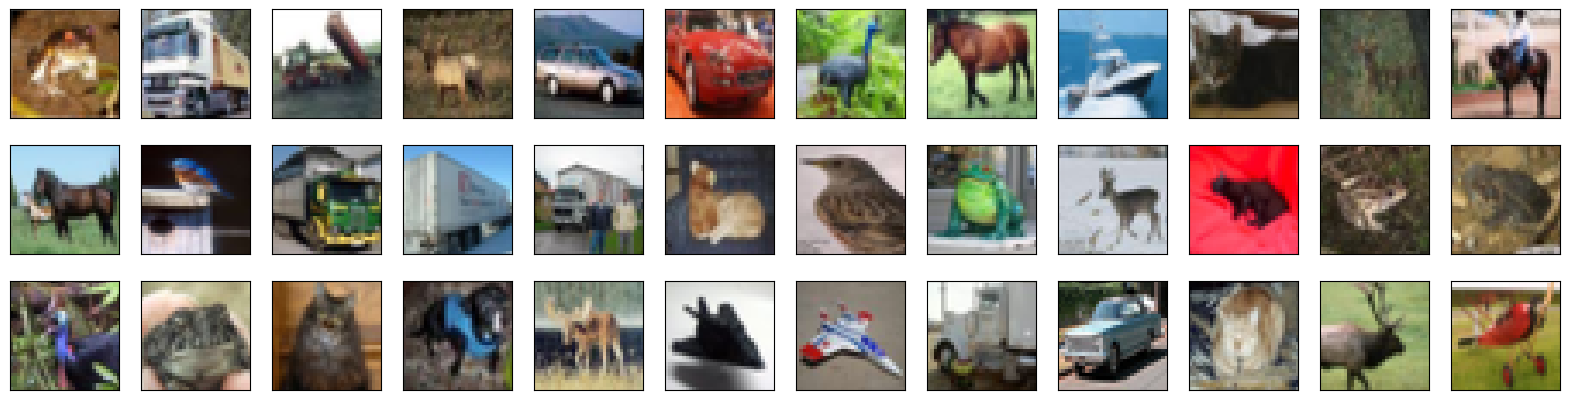

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i])# displays image

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255
In fact, the cost function has the shape of a bowl, but it can be an elongated bowl if the features have very
different scales. Figure below shows Gradient Descent on a training set where features 1 and 2 have the
same scale (on the left), and on a training set where feature 1 has much smaller values than feature 2 (on
the right).

** Tip: ** When using Gradient Descent, you should ensure that all features have a similar scale to speed up training or else it will take much longer to converge.

In [3]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [4]:
# scaling the data
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4.  Break Dataset into Training, Testing, and Validation Sets

In [5]:
#y - A vector which has integers representing various classes in the data.

y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [6]:
from tensorflow import keras

# one-hot encode the training labels and the testing labels
num_classes = len(np.unique(y_train)) # total no. of classes
y_train = keras.utils.to_categorical(y_train, num_classes) # converts the array value (class vector) into matrix
y_test = keras.utils.to_categorical(y_test, num_classes)

#Using the method to_categorical(), a numpy array (or) a vector which has integers that represent
#different categories, can be converted into a numpy array (or) a matrix which has binary values
#and has columns equal to the number of categories in the data.

# break training set into training and validation sets
# 0to4999 records for validation set. 5000toend for training set
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


### 5. Define the Model Architecture

In [7]:
from keras.models import Sequential #  to stack up the layers for our neural network
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu',
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          8256      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 64)          0

### 6. Compile the Model

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# categorical_crossentropy for multiclass classification

### 7. Train the Model

In [11]:
# Callback to save the Keras model or model weights
# ModelCheckpoint callback is used in conjunction with training using model.fit() to save
# a model or weights (in a checkpoint file) at some interval, so the model or weights can be loaded later to continue the training from the state saved

from keras.callbacks import ModelCheckpoint

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', save_best_only=True) #

hist = model.fit(x_train, y_train, batch_size=32, epochs=3,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer],
            shuffle=True)

Epoch 1/3
1407/1407 [==============================] - 43s 30ms/step - loss: 1.6199 - accuracy: 0.4160 - val_loss: 1.3894 - val_accuracy: 0.5072
Epoch 2/3
   5/1407 [..............................] - ETA: 35s - loss: 1.3460 - accuracy: 0.5063

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1407/1407 [==============================] - 43s 30ms/step - loss: 1.2770 - accuracy: 0.5437 - val_loss: 1.2199 - val_accuracy: 0.5754
Epoch 3/3
1407/1407 [==============================] - 52s 37ms/step - loss: 1.1535 - accuracy: 0.5899 - val_loss: 1.0285 - val_accuracy: 0.6366


### 8. Load the Model with the Best Validation Accuracy

In [12]:
# load the saved model for doing prediction
model.load_weights('model.weights.best.hdf5')

### 9. Visualize Some Predictions

In [13]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

313/313 [==============================] - 3s 10ms/step


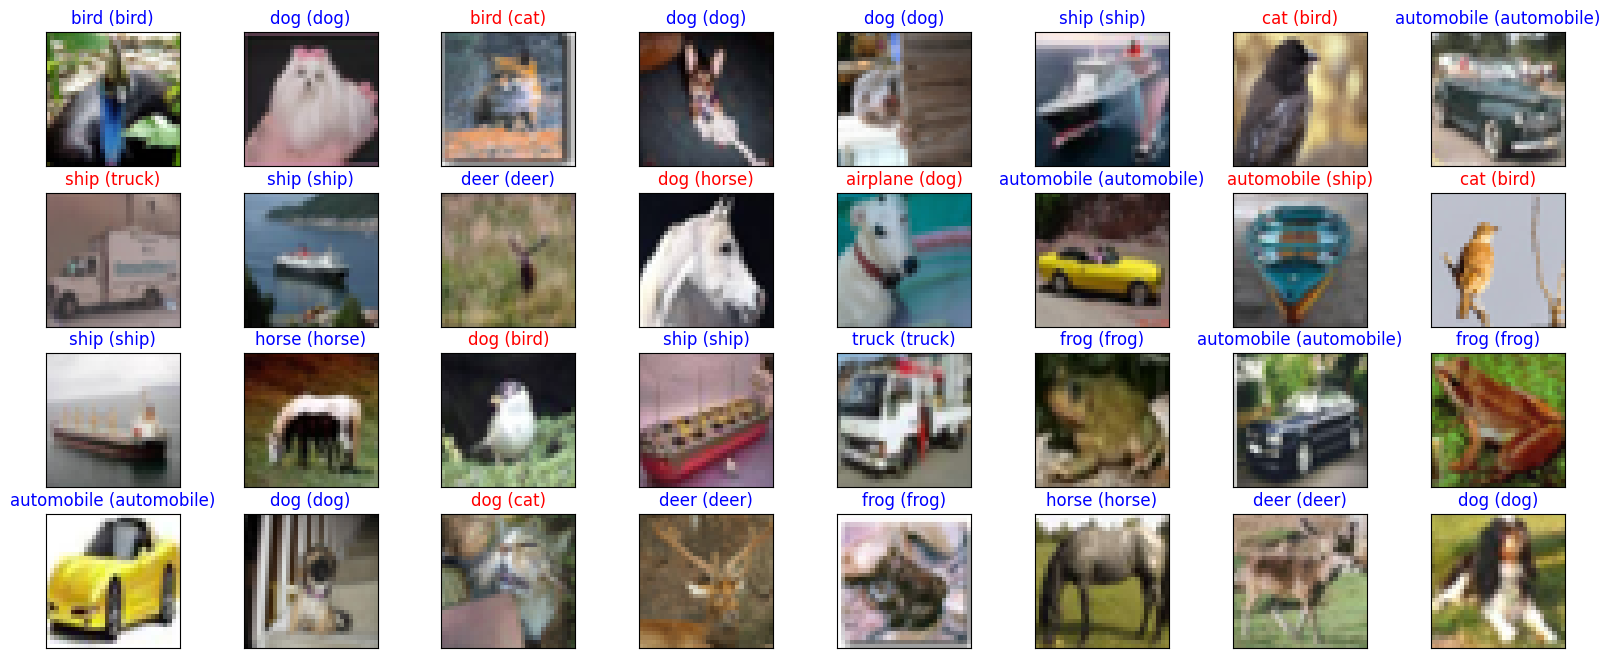

In [14]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(x_test[idx])
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [17]:
# evaluate test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 63.1600%


In [ ]:
import tensorflow as tf
img = keras.preprocessing.image.load_img(
    "/content/drive/MyDrive/horse.jpg", target_size=(32,32,3)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]
score


In [ ]:
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
cifar10_labels[np.argmax(score)]
